In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf

import talib as ta

In [2]:
df= yf.download('RELIANCE.NS', start='2020-11-14', end='2021-11-14',progress='False')

[*********************100%***********************]  1 of 1 completed


In [3]:
n = 7
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Adj Close'].shift())
df['LC'] = abs(df['Low'] - df['Adj Close'].shift())
df['TR'] = df[['HL','HC','LC']].max(axis=1)
df['ATR'] = df['TR'].rolling(n).mean()
df = df.drop(['HL','HC','LC','TR'],axis=1)

In [4]:
#df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=6)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,ATR
Date,,,,,,,
2020-11-17,2085.000000,2085.000000,1985.000000,1993.250000,1986.858398,21479385,NaN
2020-11-18,1993.250000,2006.500000,1960.099976,1987.199951,1980.827759,14030652,NaN
2020-11-19,1987.199951,2010.449951,1968.199951,1973.150024,1966.822876,12828008,NaN
2020-11-20,1975.000000,1983.800049,1895.000000,1899.500000,1893.409058,26522972,NaN
2020-11-23,1951.000000,1970.000000,1926.250000,1950.699951,1944.444824,20918665,NaN
2020-11-24,1964.000000,1974.000000,1932.000000,1964.050049,1957.752075,14277083,NaN
2020-11-25,1980.000000,1992.949951,1942.199951,1947.800049,1941.554199,15062376,63.827288
2020-11-26,1953.050049,1965.000000,1930.050049,1952.599976,1946.338745,11924527,54.534424
2020-11-27,1940.500000,1956.099976,1921.400024,1929.800049,1923.611938,21845931,52.862985


In [5]:
f = 3 # Number of factor
n = 7
# BASIC UPPERBAND = (HIGH + LOW) / 2 + Multiplier * ATR
# BASIC LOWERBAND = (HIGH + LOW) / 2 - Multiplier * ATR
df['BASIC UPPERBAND']=(df['High']+df['Low'])/2+(f*df['ATR'])
df['BASIC LOWERBAND']=(df['High']+df['Low'])/2-(f*df['ATR'])

df['FINAL UPPERBAND']=df['BASIC UPPERBAND']
df['FINAL LOWERBAND']=df['BASIC LOWERBAND']


# FINAL UPPERBAND = IF( (Current BASICUPPERBAND < Previous FINAL UPPERBAND) 
# and (Previous Close > Previous FINAL UPPERBAND)) 
# THEN (Current BASIC UPPERBAND) ELSE Previous FINALUPPERBAND)
for i in range(n,len(df)):
    if df['Close'][i-1]<=df['FINAL UPPERBAND'][i-1]:
        df['FINAL UPPERBAND'][i]=min(df['BASIC UPPERBAND'][i],df['FINAL UPPERBAND'][i-1])
    else:
        df['FINAL UPPERBAND'][i]=df['BASIC UPPERBAND'][i]    

# FINAL LOWERBAND = IF( (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) 
# and (Previous Close < Previous FINAL LOWERBAND)) 
# THEN (Current BASIC LOWERBAND) ELSE Previous FINAL LOWERBAND)
for i in range(n,len(df)):
    if df['Close'][i-1]>=df['BASIC LOWERBAND'][i-1]:
        df['FINAL LOWERBAND'][i]=max(df['BASIC LOWERBAND'][i],df['FINAL LOWERBAND'][i-1])
    else:
        df['FINAL LOWERBAND'][i]=df['BASIC LOWERBAND'][i]   
        
# SUPERTREND = IF(Current Close <= Current FINAL UPPERBAND) 
# THEN Current FINAL UPPERBAND ELSE Current  FINAL LOWERBAND
df['SUPERTREND']=np.nan
for i in df['SUPERTREND']:
    if df['Close'][n-1]<=df['FINAL UPPERBAND'][n-1]:
        df['SUPERTREND'][n-1]=df['FINAL UPPERBAND'][n-1]
    elif df['Close'][n-1]>df['FINAL UPPERBAND'][n-1]:
        df['SUPERTREND'][n-1]=df['FINAL LOWERBAND '][n-1]

for i in range(n,len(df)):
    if df['SUPERTREND'][i-1]==df['FINAL UPPERBAND'][i-1] and df['Close'][i]<=df['FINAL UPPERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL UPPERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL UPPERBAND'][i-1] and df['Close'][i]>=df['FINAL UPPERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL LOWERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL LOWERBAND'][i-1] and df['Close'][i]>=df['FINAL LOWERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL LOWERBAND'][i]
    elif df['SUPERTREND'][i-1]==df['FINAL LOWERBAND'][i-1] and df['Close'][i]<=df['FINAL LOWERBAND'][i]:
        df['SUPERTREND'][i]=df['FINAL UPPERBAND'][i]

In [6]:

df.head(10)

,Open,High,Low,Close,Adj Close,Volume,ATR,BASIC UPPERBAND,BASIC LOWERBAND,FINAL UPPERBAND,FINAL LOWERBAND,SUPERTREND
Date,,,,,,,,,,,,
2020-11-17,2085.000000,2085.000000,1985.000000,1993.250000,1986.858398,21479385,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-18,1993.250000,2006.500000,1960.099976,1987.199951,1980.827759,14030652,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-19,1987.199951,2010.449951,1968.199951,1973.150024,1966.822876,12828008,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20,1975.000000,1983.800049,1895.000000,1899.500000,1893.409058,26522972,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-23,1951.000000,1970.000000,1926.250000,1950.699951,1944.444824,20918665,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-24,1964.000000,1974.000000,1932.000000,1964.050049,1957.752075,14277083,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-25,1980.000000,1992.949951,1942.199951,1947.800049,1941.554199,15062376,63.827288,2159.056815,1776.093087,2159.056815,1776.093087,2159.056815
2020-11-26,1953.050049,1965.000000,1930.050049,1952.599976,1946.338745,11924527,54.534424,2111.128296,1783.921753,2111.128296,1783.921753,2111.128296
2020-11-27,1940.500000,1956.099976,1921.400024,1929.800049,1923.611938,21845931,52.862985,2097.338954,1780.161046,2097.338954,1783.921753,2097.338954


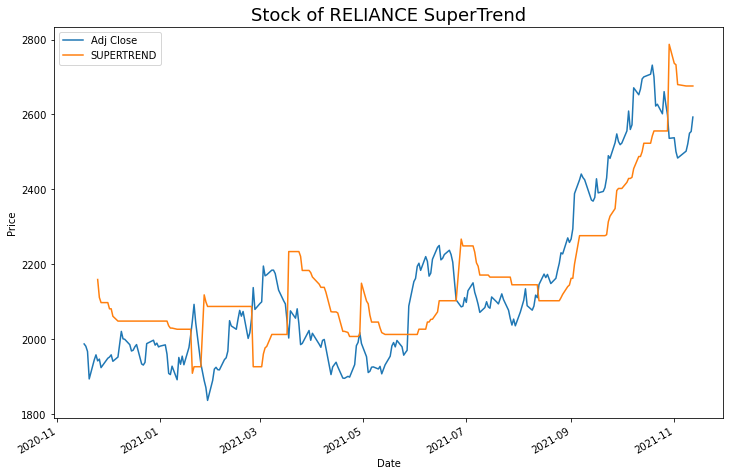

In [7]:
plt.figure(figsize=(12,8))

df['Adj Close'].plot()
df['SUPERTREND'].plot()
plt.title('Stock of RELIANCE SuperTrend', fontsize=18)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'])
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ATR,BASIC UPPERBAND,BASIC LOWERBAND,FINAL UPPERBAND,FINAL LOWERBAND,SUPERTREND,VolumePositive
0,18583.0,2085.000000,2085.000000,1985.000000,1993.250000,1986.858398,21479385,NaN,NaN,NaN,NaN,NaN,NaN,False
1,18584.0,1993.250000,2006.500000,1960.099976,1987.199951,1980.827759,14030652,NaN,NaN,NaN,NaN,NaN,NaN,False
2,18585.0,1987.199951,2010.449951,1968.199951,1973.150024,1966.822876,12828008,NaN,NaN,NaN,NaN,NaN,NaN,False
3,18586.0,1975.000000,1983.800049,1895.000000,1899.500000,1893.409058,26522972,NaN,NaN,NaN,NaN,NaN,NaN,False
4,18589.0,1951.000000,1970.000000,1926.250000,1950.699951,1944.444824,20918665,NaN,NaN,NaN,NaN,NaN,NaN,False


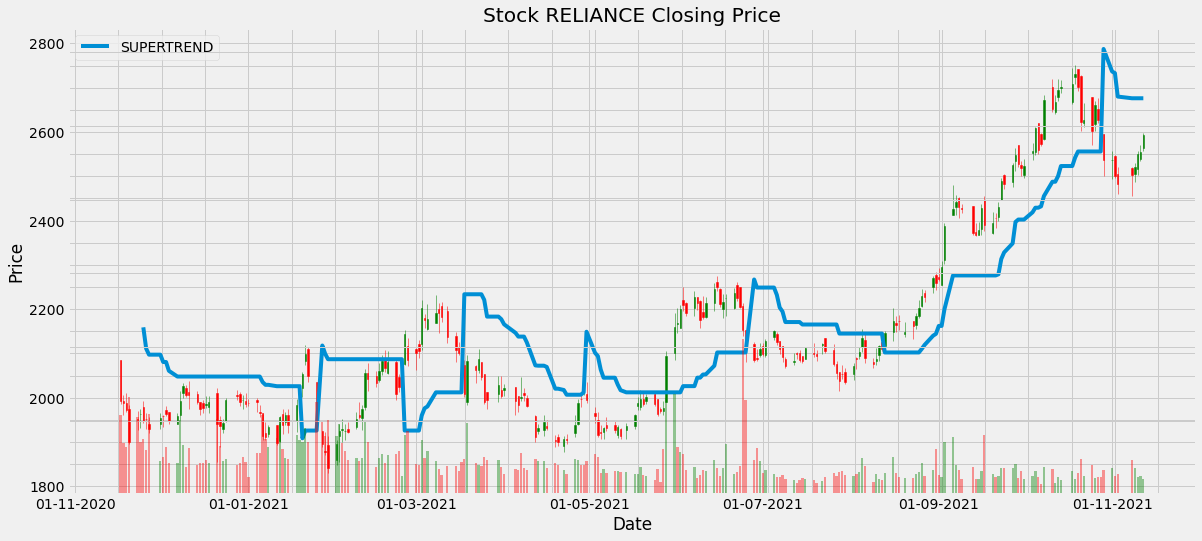

In [10]:
from mpl_finance import candlestick_ohlc

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot(111)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['SUPERTREND'], label= 'SUPERTREND')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock RELIANCE Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend()
